<a href="https://colab.research.google.com/github/RituKhandelwal87/projects/blob/main/next_5_month_predict_Multivariate_LSTM_with_Lag_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_excel('https://raw.githubusercontent.com/RituKhandelwal87/projects/main/test.xlsx',sheet_name='SPI1', index_col='Month') 

# Extract the X and Y columns as a separate numpy array
coords = df[['X', 'Y']].values

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df.drop(['X', 'Y'], axis=1))

# Define the number of timesteps and features
n_features = data.shape[1] + 2  # add 2 for the latitude and longitude features
n_timesteps = 5










In [3]:
# for lead time 1
'''def create_dataset(data, coords, n_timesteps):
    X, y = [], []
    coords_resized = np.resize(coords, (len(data), 2))
    for i in range(n_timesteps, len(data)):
        # get the input and output sequences
        X.append(np.hstack((data[i-n_timesteps:i, :], coords_resized[i-n_timesteps:i, :])))
        y.append(data[i, :])
    return np.array(X), np.array(y)
    '''

'def create_dataset(data, coords, n_timesteps):\n    X, y = [], []\n    coords_resized = np.resize(coords, (len(data), 2))\n    for i in range(n_timesteps, len(data)):\n        # get the input and output sequences\n        X.append(np.hstack((data[i-n_timesteps:i, :], coords_resized[i-n_timesteps:i, :])))\n        y.append(data[i, :])\n    return np.array(X), np.array(y)\n    '

In [4]:
# for any lead time 
def create_dataset(data, coords, lead_time, n_timesteps):
    X, y = [], []
    coords_resized = np.resize(coords, (len(data), 2))
    for i in range(n_timesteps + lead_time, len(data)):
        # get the input and output sequences
        X.append(np.hstack((data[i-n_timesteps-lead_time:i-lead_time, :], coords_resized[i-n_timesteps:i, :])))
        y.append(data[i, :])
    return np.array(X), np.array(y)

In [13]:
# Split the data into train and test sets
df_train = df[:-300]
df_test = df[-300:]
# Define the coordinates for the test data
coords_test = df_test[['X', 'Y']].values

# Create the training data
#train_x, train_y = create_dataset(df_train.drop(['X', 'Y'], axis=1).values, coords[:-5], n_timesteps)
train_x, train_y = create_dataset(df_train.drop(['X', 'Y'], axis=1).values, coords[:-5],5, n_timesteps)

# Reshape train_x to include the timestep dimension
train_x = np.reshape(train_x, (train_x.shape[0], n_timesteps, n_features))
print(train_y.shape)



(1190, 4)


In [6]:
print(train_y.shape)

(1190, 4)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)))
lstm_model.add(Dense(data.shape[1]))
lstm_model.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'], run_eagerly=True)

# Train the LSTM model
lstm_model.fit(train_x, train_y, epochs=20, batch_size=32, shuffle=False, verbose=1)

# Create the test data
test_x, test_y = create_dataset(df_test.drop(['X', 'Y'], axis=1).values, coords[-5:], 5,n_timesteps)

# Reshape test_x to include the timestep dimension
test_x = np.reshape(test_x, (test_x.shape[0], n_timesteps, n_features))
print(test_x.shape)


Epoch 1/20
38/38 [==============================] - 5s 117ms/step - loss: 10.2410 - mae: 10.2410
Epoch 2/20
38/38 [==============================] - 5s 131ms/step - loss: 8.3351 - mae: 8.3351
Epoch 3/20
38/38 [==============================] - 4s 111ms/step - loss: 8.0574 - mae: 8.0574
Epoch 4/20
38/38 [==============================] - 2s 50ms/step - loss: 7.8916 - mae: 7.8916
Epoch 5/20
38/38 [==============================] - 2s 49ms/step - loss: 7.6849 - mae: 7.6849
Epoch 6/20
38/38 [==============================] - 2s 49ms/step - loss: 7.5462 - mae: 7.5462
Epoch 7/20
38/38 [==============================] - 2s 57ms/step - loss: 7.3338 - mae: 7.3338
Epoch 8/20
38/38 [==============================] - 2s 62ms/step - loss: 7.1315 - mae: 7.1315
Epoch 9/20
38/38 [==============================] - 2s 50ms/step - loss: 7.0089 - mae: 7.0089
Epoch 10/20
38/38 [==============================] - 2s 48ms/step - loss: 7.1256 - mae: 7.1256
Epoch 11/20
38/38 [==============================] - 2

10/10 [==============================] - 0s 26ms/step
(290, 4)
[[[ 4.43657684e-01  3.04741182e+00  4.74894998e+01  3.85830455e+01
    7.17500000e+01  2.72500000e+01]
  [-3.90903102e-01  4.84489455e-01  3.88654545e+01  2.30064999e+01
    7.17500000e+01  2.72500000e+01]
  [-1.14065504e+00  5.25606727e-01  3.20326817e+01  2.74672727e+00
    7.17500000e+01  2.72500000e+01]
  [-2.05048603e-01  1.14432673e+00  2.06496364e+01  4.41086364e+00
    7.17500000e+01  2.72500000e+01]
  [-4.65529086e-01  1.58174727e-01  1.69845454e+01  1.07153636e+01
    7.17500000e+01  2.72500000e+01]]

 [[-3.90903102e-01  4.84489455e-01  3.88654545e+01  2.30064999e+01
    7.17500000e+01  2.72500000e+01]
  [-1.14065504e+00  5.25606727e-01  3.20326817e+01  2.74672727e+00
    7.17500000e+01  2.72500000e+01]
  [-2.05048603e-01  1.14432673e+00  2.06496364e+01  4.41086364e+00
    7.17500000e+01  2.72500000e+01]
  [-4.65529086e-01  1.58174727e-01  1.69845454e+01  1.07153636e+01
    7.17500000e+01  2.72500000e+01]
  [ 4.85

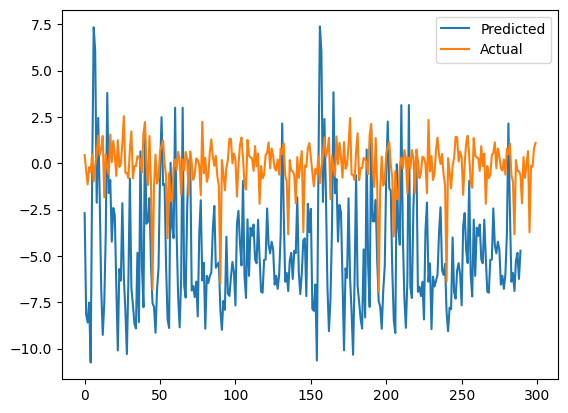

In [8]:
# Make predictions on the test data
test_predictions = lstm_model.predict(test_x)
print(test_y.shape)
print(test_x)

# Get the actual values for the test data
test_y = df_test.drop(['X', 'Y'], axis=1).values

# Reshape the test_y to match the shape of test_predictions
test_y = test_y[-test_predictions.shape[0]:]


#print(test_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
print(test_predictions)
# Invert scaling of the actual values
test_y = scaler.inverse_transform(test_y)
print(test_y)

# calculate RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
r2_score = r2_score(test_y, test_predictions)
print('Test RMSE: %.3f' % r2_score)
print(test_y.shape)
print(test_predictions.shape)
print(mean_squared_error(test_y, test_predictions))
print(mean_absolute_error(test_y, test_predictions))

# Get the actual values for the test data
test_y = df_test.drop(['X', 'Y'], axis=1).values

# Plot the actual vs predicted values for the test data
plt.plot(test_predictions[:, 0], label='Predicted')
plt.plot(test_y[:, 0], label='Actual')
plt.legend()
plt.show()

In [9]:
print(test_predictions)

[[-2.6923845e+00  1.6693897e+01  5.4577041e+03  5.9505747e+03]
 [-8.1534071e+00  8.6994905e+00  6.3175278e+03  3.8259412e+03]
 [-8.5922718e+00  6.5288033e+00  5.8069873e+03  2.7806597e+03]
 ...
 [-4.8331180e+00  1.2986316e+01  1.5555238e+03  4.2172329e+03]
 [-6.2399907e+00  1.0935502e+01  2.4124863e+03  3.5075298e+03]
 [-4.7174330e+00  1.3510894e+01  2.0727097e+03  3.4635164e+03]]


In [11]:
coords_test = coords_test.reshape((1, 2))
# Get the last timestamp from the test data
last_timestamp = df_test.index[-1]

# Generate the next 5 timestamps
next_timestamps = pd.date_range(start=last_timestamp, periods=6, freq='M')[1:]


# Predict the next 5 months
for i in range(1, 6):
    # Get the input sequence for the next month
    next_x = np.hstack((test_x[-1, 1:], [next_timestamps[i-1].month], [next_timestamps[i-1].year], coords_test[-1, :]))
    next_x = np.reshape(next_x, (1, n_timesteps, n_features))

    # Predict the SPI3 value for the next month
    next_prediction = lstm_model.predict(next_x)

    # Invert scaling of the predicted value
    next_prediction = scaler.inverse_transform(next_prediction)

    # Print the predicted value for the next month
    print('Predicted SPI3 for {}: {:.2f}'.format(next_timestamps[i-1].strftime('%Y-%m-%d'), next_prediction[0][0]))


ValueError: ignored